<a id = 'intro'></a>
# Boston data analysis using neural network

Here, we will develop, evaluate and compare the performance and predictive power of a simple linear regression model and neural network on boston housing price data

Here the target is to determine the price of the property based on the features

# Dataset

The dataset used in the anlysis comes from the UCI Machine Learning Repository. This data was collected in 1978 and each of the 506 entries represents aggregate information about 14 features of homes from various suburbs located in Boston.

The features can be summarized as follows:
* CRIM: This is the per capita crime rate by town
* ZN: This is the proportion of residential land zoned for lots larger than 25,000 sq.ft.
* INDUS: This is the proportion of non-retail business acres per town.
* CHAS: This is the Charles River dummy variable (this is equal to 1 if tract bounds river; 0 otherwise)
* NOX: This is the nitric oxides concentration (parts per 10 million)
* RM: This is the average number of rooms per dwelling
* AGE: This is the proportion of owner-occupied units built prior to 1940
* DIS: This is the weighted distances to five Boston employment centers
* RAD: This is the index of accessibility to radial highways
* TAX: This is the full-value property-tax rate per 1000 bucks
* PTRATIO: This is the pupil-teacher ratio by town
* B: This is calculated as 1000(Bk — 0.63)², where Bk is the proportion of people of African American descent by town
* LSTAT: This is the percentage lower status of the population
* MEDV: This is the median value of owner-occupied homes in 1000s

<a id = 'library'></a>
# Importing libraries and the dataset

In [1]:
#Importing the pandas for data processing and numpy for numerical computing
import numpy as np
import pandas as pd

In [2]:
# Importing the Boston Housing dataset from the sklearn
from sklearn.datasets import load_boston
boston = load_boston()

In [3]:
#Converting the data into pandas dataframe
data = pd.DataFrame(boston.data)

### Look at the dataset

In [4]:
#First look at the data
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
#Adding the feature names to the dataframe
data.columns = boston.feature_names

In [6]:
#Adding the target variable to the dataset
data['PRICE'] = boston.target 

In [7]:
#Looking at the data with names and target variable
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [8]:
#Length of the data
print(data.shape)

(506, 14)


In [9]:
#Checking the missing values in the dataset
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

No null values in the dataset, no missing value treatement needed

In [10]:
#Checking the statistics of the data
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


This is sometimes very useful, for example if you look at the CRIM the max is 88.97 and 75% of the value is below 3.677083 and mean is 3.613524 so it means the max values is actually an outlier or there are outliers present in the column

<a id = 'visual'></a>
# Visualisation

/Users/hoqueme/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PRICE', ylabel='Density'>

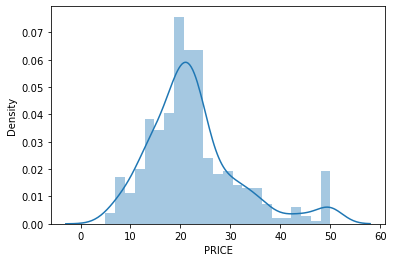

In [11]:
#checking the distribution of the target variable
import seaborn as sns
sns.distplot(data.PRICE)

The distribution seems normal, has not be the data normal we would have perform log transformation or took to square root of the data to make the data normal. Normal distribution is need for the machine learning for better predictiblity of the model

<a id = 'split'></a>
### Splitting the dependent feature and independent feature 

In [13]:
#X = data[['LSTAT','RM','PTRATIO']]
X = data.iloc[:,:-1]
y= data.PRICE

<a id = 'valid'></a>
### Splitting the data for Model Validation 

In [14]:
# Splitting the data into train and test for building the model
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 4)

<a id = 'build'></a>
### Building the Model 

In [15]:
#Linear Regression 
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [16]:
#Fitting the model
regressor.fit(X_train,y_train)

LinearRegression()

<a id = 'evaluate'></a>
### Model Evaluation

In [17]:
#Prediction on the test dataset
y_pred = regressor.predict(X_test)

In [18]:
# Predicting RMSE the Test set results
from sklearn.metrics import mean_squared_error
rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
print(rmse)

5.041784121402046


In [19]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(r2)

0.7263451459702516


<a id  = 'NN'></a>
## Feed Forward Neural Networks

In [20]:
#Scaling the dataset
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

* We are using Keras for developing the neural network.
* Models in Keras are defined as a sequence of layers
* We create a Sequential model and add layers one at a time with activation function
* Activation function decides, whether a neuron should be activated or not by calculating weighted sum and further adding bias with it. The purpose of the activation function is to introduce non-linearity into the output of a neuron.The activation we are using is relu
* As this is a regression problem, the output layer has no activation function
* Elements of neural network has input layer, hidden layer and output layer
* Model Compilation:- The compilation is the final step in creating a model. Once the compilation is done, we can move on to training phase.
* Optimizer: - (Backpropagation) The optimizer we are using is adam. "Adam" is an optimization algorithm that can be used instead of the classical stochastic gradient descent (SGD) procedure to update network weights iterative based in training data.
* Loss - mean square error

In [21]:
#Creating the neural network model
import keras
from keras.layers import Dense, Activation,Dropout
from keras.models import Sequential

model = Sequential()

model.add(Dense(128,activation  = 'relu',input_dim =13))
model.add(Dense(64,activation  = 'relu'))
model.add(Dense(32,activation  = 'relu'))
model.add(Dense(16,activation  = 'relu'))
model.add(Dense(1))
model.compile(optimizer = 'adam',loss = 'mean_squared_error')

ModuleNotFoundError: No module named 'keras'

In [22]:
model.fit(X_train, y_train, epochs = 100)

NameError: name 'model' is not defined

<a id = 'eval'></a>
### Evaluation of the model

In [32]:
y_pred = model.predict(X_test)

In [33]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(r2)

In [34]:
# Predicting RMSE the Test set results
from sklearn.metrics import mean_squared_error
rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
print(rmse)

<a id = 'conclude'></a>
## Conclusion

Using a simple neural network, we were able to improve the model significantly.